In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
% matplotlib inline

In [2]:
# Bajado todo de: https://archive.ics.uci.edu/ml/index.php

In [16]:
iris = pd.read_csv("../Datasets/iris.txt")
# Se puede pasar el header dentro del parámetro
# "names"
iris

,sepalLength,sepalWidth,petalLength,petalWidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [17]:
iris.dtypes

sepalLength    float64
sepalWidth     float64
petalLength    float64
petalWidth     float64
class           object
dtype: object

Iris Setosa
Iris Versicolour
Iris Virginica

In [18]:
iris.columns

Index(['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'class'], dtype='object')

In [26]:
setosa = iris[iris["class"] == "Iris-setosa"]
versicolor = iris[iris["class"] == "Iris-versicolor"]
virginica = iris[iris["class"] == "Iris-virginica"]

In [27]:
setosa.shape

(50, 5)

In [28]:
versicolor.shape

(50, 5)

In [29]:
virginica.shape

(50, 5)

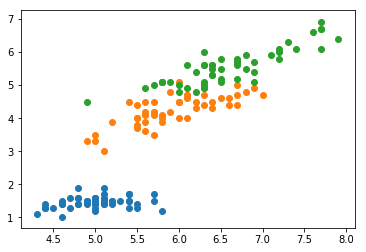

In [33]:
# PLoteo de dos atributos.
plt.scatter(setosa.sepalLength.values,setosa.petalLength.values)
plt.scatter(versicolor.sepalLength.values,versicolor.petalLength.values)
plt.scatter(virginica.sepalLength.values,virginica.petalLength.values)

In [36]:
## Regresión Logística.
clasificador = LogisticRegression()


In [41]:
petalLength = iris["petalLength"].values.reshape(150,1)
petalWidth = iris["petalWidth"].values.reshape(150,1)
sepalLength = iris["sepalLength"].values.reshape(150,1)
sepalWidth = iris["sepalWidth"].values.reshape(150,1)
clase = iris["class"].values
X = np.concatenate([petalLength, petalWidth, sepalLength,sepalWidth], axis=1)

In [42]:
clasificador.fit(X,clase)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
clase_pred = clasificador.predict(X)
clase_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [44]:
confusion_matrix(clase,clase_pred)

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]])

In [45]:
clasificador.coef_

array([[-2.26214118, -1.0290951 ,  0.41498833,  1.46129739],
       [ 0.57765763, -1.38553843,  0.41663969, -1.60083319],
       [ 2.47097168,  2.55538211, -1.70752515, -1.53426834]])

In [46]:
clasificador2 = KNeighborsClassifier(n_neighbors=5)

In [50]:
clasificador2.fit(X,clase)
clase_pred2 = clasificador2.predict(X)
confusion_matrix(clase, clase_pred2, labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]])

- Implemente un "buen" clasificador para clasificar los tres tipos de abalones presentes en el dataset "abalones.txt".
¡Atención! Para evaluar bien la performance, considere separación de training/testing (!)

Entregable.